# Crime data analysis module - Reclaim The Night Leeds (RTNL)

## Disclaimer and introduction

This Jupyter Notebook demonstrates how to use the crime data analysis module produced by RTNL to identify crime hotspots in UK constituincies. It is an early beta version of the module so there are many missing features. To suggest new features or to report a bug please create an issue on the github https://github.com/Tasty213/crime-hotspots-uk.

The use of data produced by this program is not necessarily endorsed by RTNL. Using this program does not mean we endorse you, your organisation or your aims. We are more than welcome to recieve requests to collaborate on projects and to spread information if we deem it in line with our aims. To work with us please contact RTNLeeds [at] gmail.com

We welcome pull requests and contributions from anyone who wishes to expand the capacity of the module

## Tutorial
The rest of this notebook is dedicated to explaining how to use the module and demonstrating its capabillities.

### Importing
The module itself is held in the /src directory of this git directory, this cell will import the module. We are working on distributing the package via pip and any assistance in this would be greatly appreciated.

In [15]:
import sys  
sys.path.insert(0, 'src/')
import dataCollection

### Initialisation
The main class of the module is Reclaim() and it's init function takes two optional arguments.
* update: A boolean value (True/False) that tells the module whether to update its constituincy boundaries file. This is set to False by default as the boundaries are updated rarely and a copy of the latest is included here for your convinience. This default file can be found and is doccumented here https://geoportal.statistics.gov.uk/datasets/5ce27b980ffb43c39b012c2ebeab92c0_2 
* file_name: The file name of .geojson file that represents the boundaries of UK constituincies. Note that this data must be in the same format (with the same descriptors etc) as the original file.

In [16]:
data = dataCollection.Reclaim()

### Data Collection
After loading in the constituincy boundaries you should check that the constituincy you want is included in the ones identified. Do this by accessing the constituincies member.

In [18]:
data.constituincies

['Aldershot',
 'Aldridge-Brownhills',
 'Altrincham and Sale West',
 'Amber Valley',
 'Arundel and South Downs',
 'Ashfield',
 'Ashford',
 'Ashton-under-Lyne',
 'Aylesbury',
 'Banbury',
 'Barking',
 'Barnsley Central',
 'Barnsley East',
 'Barrow and Furness',
 'Basildon and Billericay',
 'Basingstoke',
 'Bassetlaw',
 'Bath',
 'Batley and Spen',
 'Battersea',
 'Beaconsfield',
 'Beckenham',
 'Bedford',
 'Bermondsey and Old Southwark',
 'Berwick-upon-Tweed',
 'Bethnal Green and Bow',
 'Beverley and Holderness',
 'Bexhill and Battle',
 'Bexleyheath and Crayford',
 'Birkenhead',
 'Birmingham, Edgbaston',
 'Birmingham, Erdington',
 'Birmingham, Hall Green',
 'Birmingham, Hodge Hill',
 'Birmingham, Ladywood',
 'Birmingham, Northfield',
 'Birmingham, Perry Barr',
 'Birmingham, Selly Oak',
 'Birmingham, Yardley',
 'Bishop Auckland',
 'Blackburn',
 'Blackley and Broughton',
 'Blackpool North and Cleveleys',
 'Blackpool South',
 'Blaydon',
 'Blyth Valley',
 'Bognor Regis and Littlehampton',
 'Bols

Then view the different crime types that can be selected to analyse. At the moment we can only analye one type at a time and there is much variation in the specifity of the types. For a detailed definition  of each crime type see https://www.police.uk/pu/contact-the-police/what-and-how-to-report/what-report/. We are aware the data is quite broad at the moment and are lobbying the police to provide a better breakdown where it is safe to do so.

In [19]:
data.crime_types

{'All crime': 'all-crime',
 'Anti-social behaviour': 'anti-social-behaviour',
 'Bicycle theft': 'bicycle-theft',
 'Burglary': 'burglary',
 'Criminal damage and arson': 'criminal-damage-arson',
 'Drugs': 'drugs',
 'Other theft': 'other-theft',
 'Possession of weapons': 'possession-of-weapons',
 'Public order': 'public-order',
 'Robbery': 'robbery',
 'Shoplifting': 'shoplifting',
 'Theft from the person': 'theft-from-the-person',
 'Vehicle crime': 'vehicle-crime',
 'Violence and sexual offences': 'violent-crime',
 'Other crime': 'other-crime'}

Finally run the get_data function to load in the data for your chosen constituincy. This function takes two arguments:

* constituincies: A python list (https://docs.python.org/3/tutorial/datastructures.html) of constituincy names to get the data for. Make sure the name is exactly as shown in the  constituincies member preferably by copying it in. If you want to run the analysis for the entire country simply pass the member itself. However this is not advised unless you are using a High Performance Computing Cluster (supercomputer)
* crime_type: The string name of a crime type as identified by the crime_types member. This will is automatically updated when the module is initalised.

For the purpose of demonstration this notebook will use Uxbridge and South Ruslip (the constituincy of Boris Johnson the PM at time of writing) and the crime type Violence and Sexual Offences.

The data in question is collected using the public police UK API https://data.police.uk and is used under the Open Government License V3.0. The exact method used is street level crimes documented here https://data.police.uk/docs/method/crime-street/. 

The data collected covers March 2018 to February 2021.

In [29]:
data.get_data(constituincies = ['Uxbridge and South Ruislip'], 
              crime_type = 'Violence and sexual offences')

### Correct localisation points
Some of the data retrieved gives its location using names that aren't very useful. The following list is the ones we have identified so far however there is no publically availabe list of all of them. We are submitting a FOI request to identify the remainder.
```
ignore = ['On or near Parking Area',
		  'On or near Shopping Area',
		  'On or near Sports/recreation Area',
		  'On or near Supermarket',
		  'On or near Petrol Station',
		  'On or near Nightclub',
		  'On or near Pedestrian Subway',
		  'On or near Further/higher Educational Building',
		  'On or near Bus/coach Station',
		  'On or near Hospital',
		  'On or near Conference/exhibition Centre',
		  'On or near Theatre/concert Hall',
		  'On or near Police Station']
```
This are generic names that are used whenever a crime happens near a certain kind of location. While we hope this will be usefull in the future (to identify Britains most dangerous bus stop or which supermarket has the most bike thefts) for the moment we will correct the data. To do this we iterate through all the data points collected and for any with a non localised name snap it to the nearest known point. 

In [30]:
data.fix_locations()

### Plot the hotspots as a barchart
Finally specify how many of the hotspots you want to plot and the name of the chart to plot a bar chart of the results. This function takes two arguments:
* top: How many hotspots you want to plot (for instance 10 would plot the top 10 hotspots)
* location: What to put the location as in the plot title. The title is assembled as ({crime_type} is taken from the initial data request):
` 'Number of reported ' + {crime_type} + ' crimes in locations within ' + {location} + ' since 2018, top ' + {top} + ' locations' `

This function will also save a jpeg of the bar chart to `locationFrequency.jpeg`. 

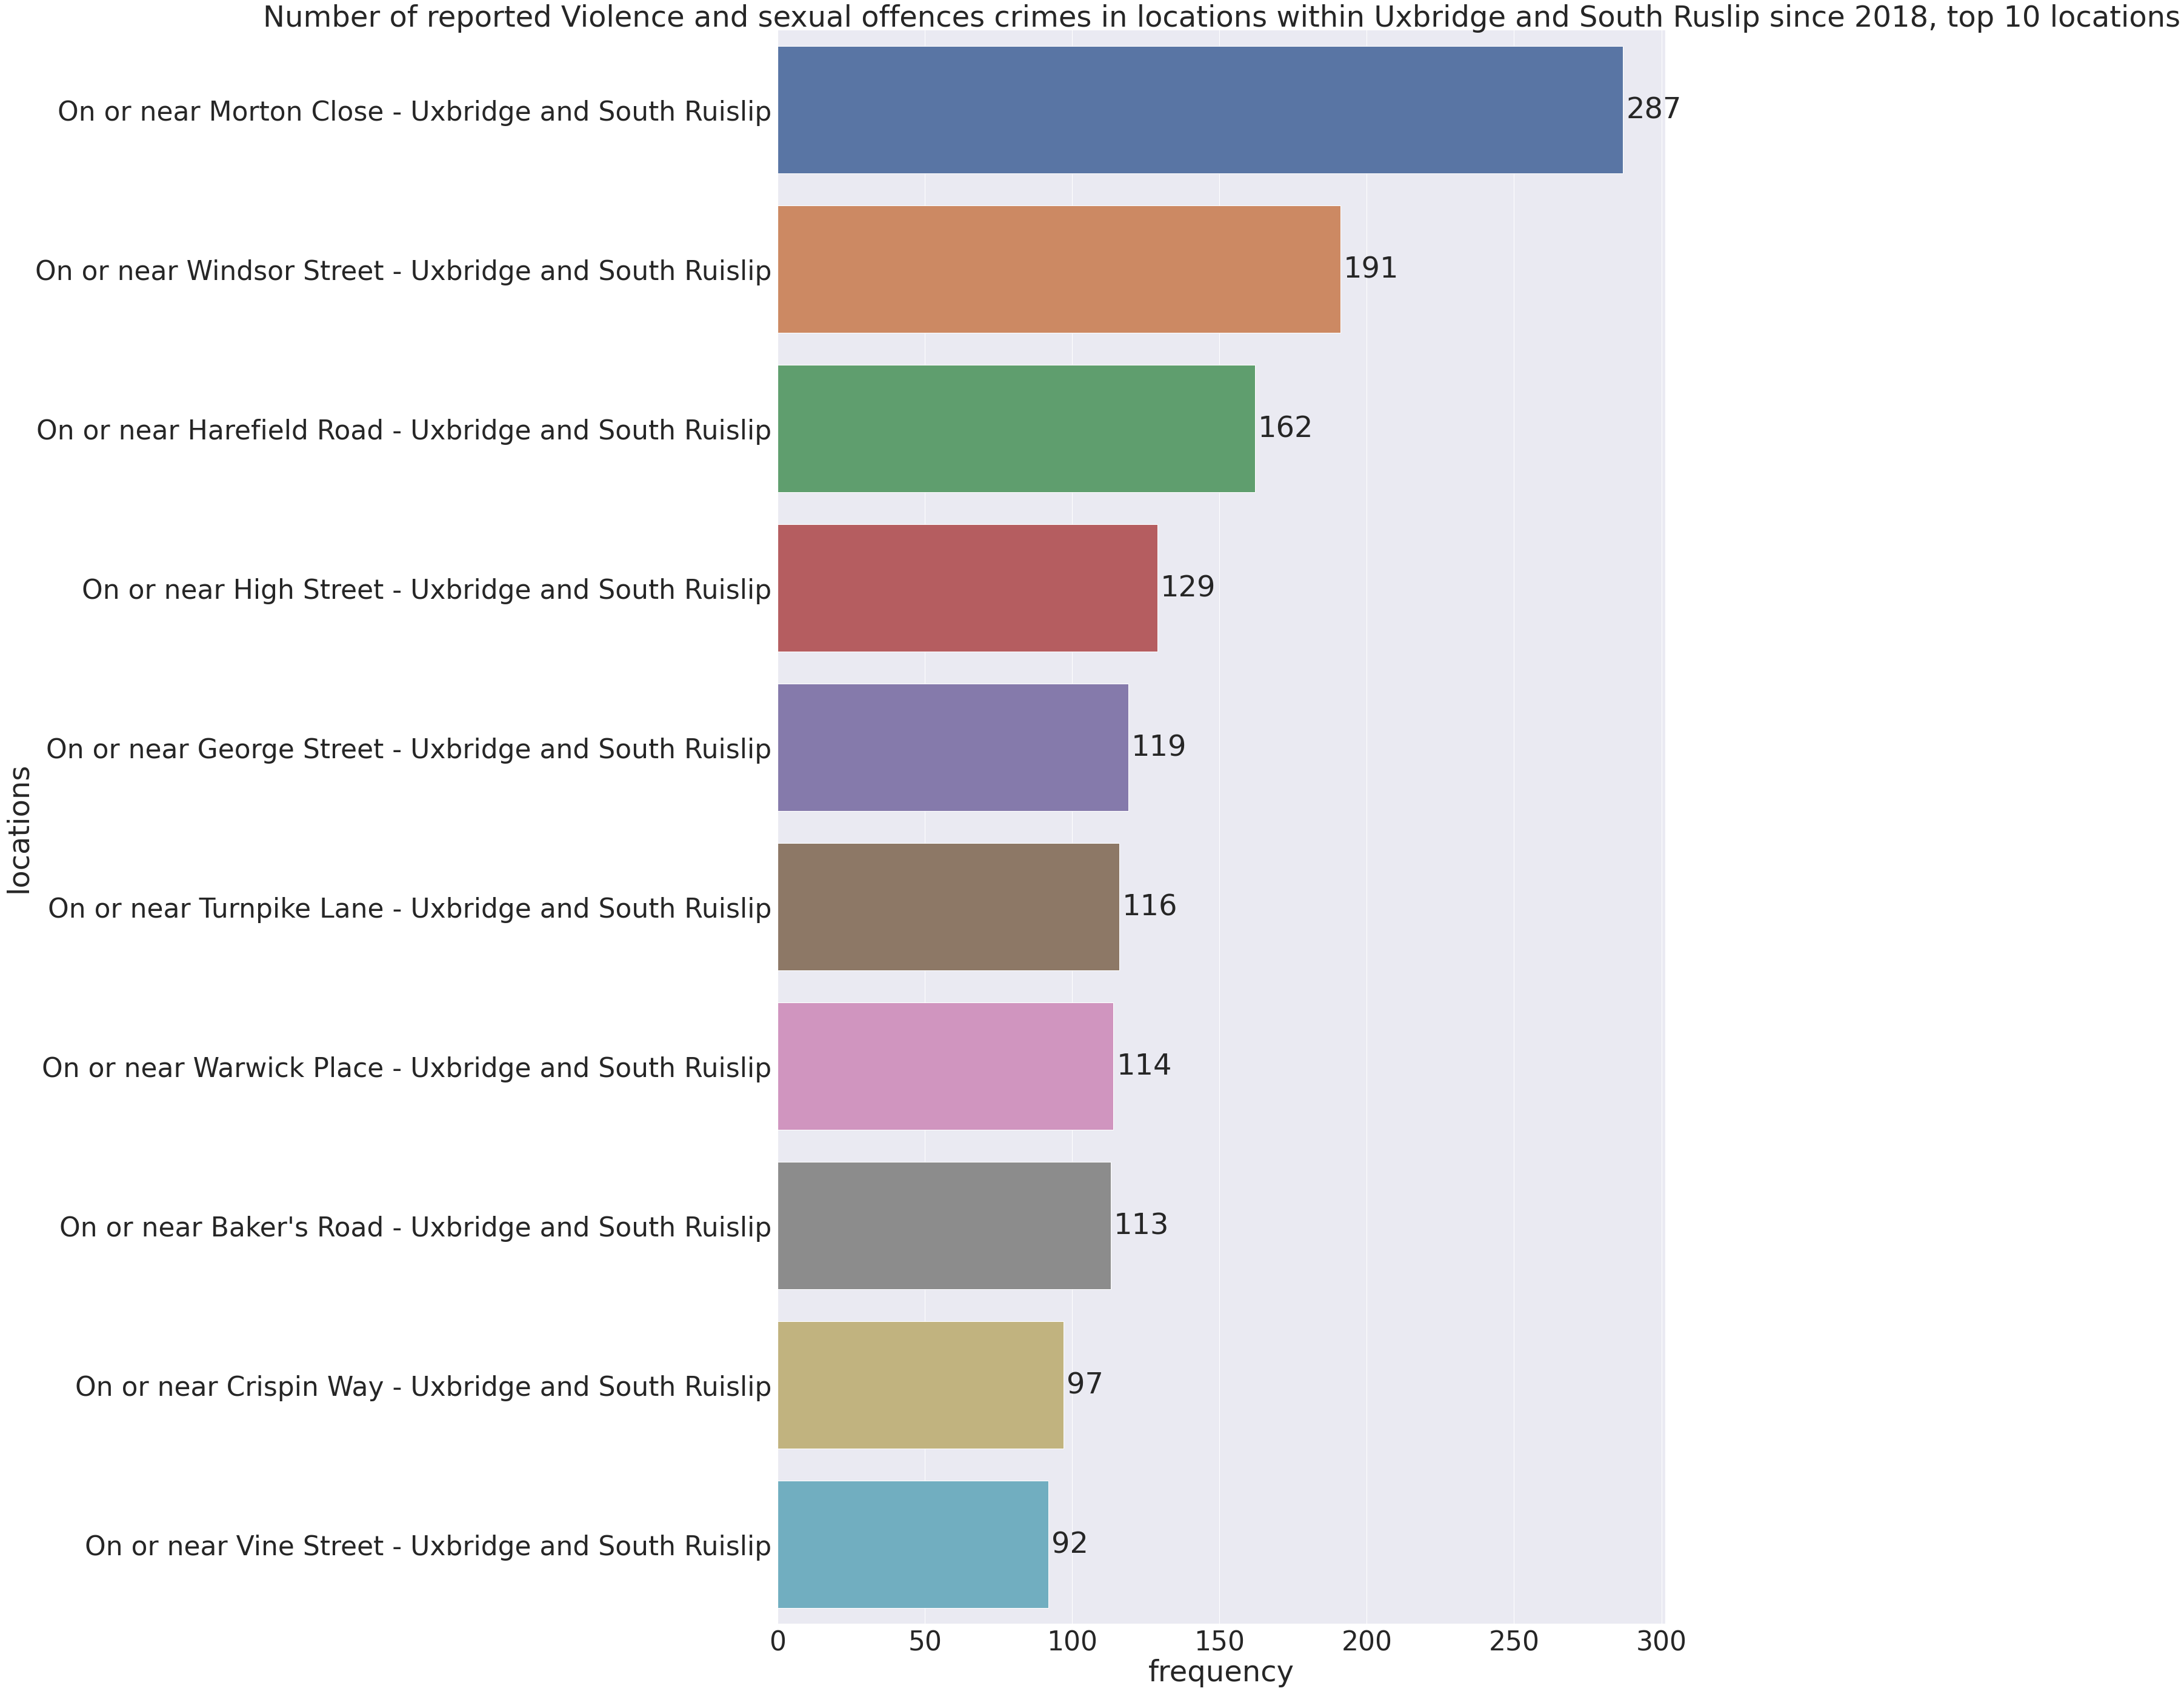

In [31]:
data.hotspots_graph(top = 10, location = 'Uxbridge and South Ruslip')

If you wish to present the data in a custom manner access the hotspots data directly with:

In [32]:
data.locations

,locations,frequency
0,On or near Morton Close - Uxbridge and South R...,287
1,On or near Windsor Street - Uxbridge and South...,191
2,On or near Harefield Road - Uxbridge and South...,162
3,On or near High Street - Uxbridge and South Ru...,129
4,On or near George Street - Uxbridge and South ...,119
5,On or near Turnpike Lane - Uxbridge and South ...,116
6,On or near Warwick Place - Uxbridge and South ...,114
7,On or near Baker's Road - Uxbridge and South R...,113
8,On or near Crispin Way - Uxbridge and South Ru...,97
9,On or near Vine Street - Uxbridge and South Ru...,92


# Conclusion

I hope this program has helped demonstrate the capabilities of the module. If you spotted any bugs, feature imporvements or areas for optimisation free to raise an issue or submit a pull request.